Etude de la matrice de rotation du skate:
https://thepoorengineer.com/en/quaternion/

In [1]:
import os
import sys

print(sys.path)
if '\\Users\\Pierre\\Documents\\GitHub\\SkateboardXXX3000\\01_Python\\MovuinoDataHandler\\' not in sys.path:
    sys.path.append('\\Users\\Pierre\\Documents\\GitHub\\SkateboardXXX3000\\01_Python\\MovuinoDataHandler\\')
    print("ok")

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.interpolate import interp1d
from scipy.signal import find_peaks

import movuinos.SkateboardXXX3000DataSet as sk
import tools.display_functions as df
import tools.signal_analysis as sa
import tools.integratino_functions as ifct
import tools.correction_interpolation as ci

import models.detection.detection_energy as dt
import models.classification.reference_tricks_classification as rtc

from pathlib import Path

from tools.quaternion import Quaternion#, get_euler_angles, get_rot_mat

['c:\\Users\\Pierre\\Documents\\GitHub\\SkateboardXXX3000\\01_Python\\MovuinoDataHandler\\study', 'C:\\Users\\Pierre\\AppData\\Local\\Programs\\Python\\Python310\\python310.zip', 'C:\\Users\\Pierre\\AppData\\Local\\Programs\\Python\\Python310\\DLLs', 'C:\\Users\\Pierre\\AppData\\Local\\Programs\\Python\\Python310\\lib', 'C:\\Users\\Pierre\\AppData\\Local\\Programs\\Python\\Python310', 'c:\\Users\\Pierre\\Documents\\GitHub\\SkateboardXXX3000\\01_Python\\MovuinoDataHandler\\venv', '', 'c:\\Users\\Pierre\\Documents\\GitHub\\SkateboardXXX3000\\01_Python\\MovuinoDataHandler\\venv\\lib\\site-packages', 'c:\\Users\\Pierre\\Documents\\GitHub\\SkateboardXXX3000\\01_Python\\MovuinoDataHandler\\venv\\lib\\site-packages\\win32', 'c:\\Users\\Pierre\\Documents\\GitHub\\SkateboardXXX3000\\01_Python\\MovuinoDataHandler\\venv\\lib\\site-packages\\win32\\lib', 'c:\\Users\\Pierre\\Documents\\GitHub\\SkateboardXXX3000\\01_Python\\MovuinoDataHandler\\venv\\lib\\site-packages\\Pythonwin']
ok


In [2]:
tricks_path = "../../../06_Data/Isolated_Tricks/pop_shovit/pop_shovit_success_3.csv"

print(Path(tricks_path).exists())
print(Path(tricks_path).glob(pattern="*"))
#--- Opening file ---
print("Opening : " + tricks_path)
trick = sk.SkateboardXXX3000DataSet(tricks_path)

True
<generator object Path.glob at 0x000002423962D460>
Opening : ../../../06_Data/Isolated_Tricks/pop_shovit/pop_shovit_success_3.csv
Reading : ../../../06_Data/Isolated_Tricks/pop_shovit/pop_shovit_success_3.csv


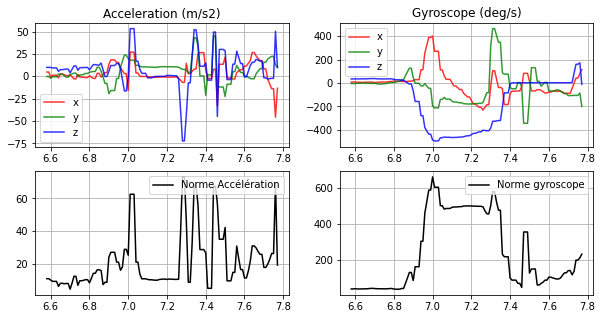

In [3]:
plt.figure(figsize=(10,5))
trick.dispRawData()

[-84.79775368   6.30253575   2.29183118]
[ 0.08035573 -0.06256386  0.30239898 -0.99601836]
[[-1.07312644  0.12223307  0.17322848]
 [-0.19791006 -0.89806463 -0.59233514]
 [ 0.07603052 -0.61244459  0.90315024]]


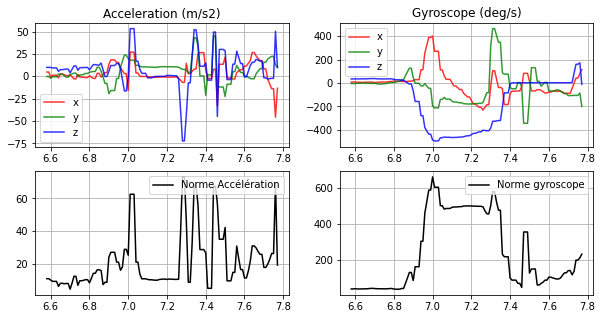

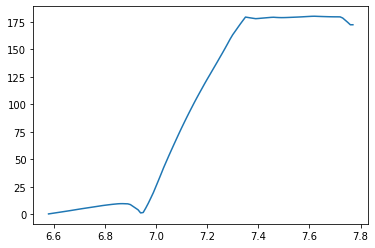

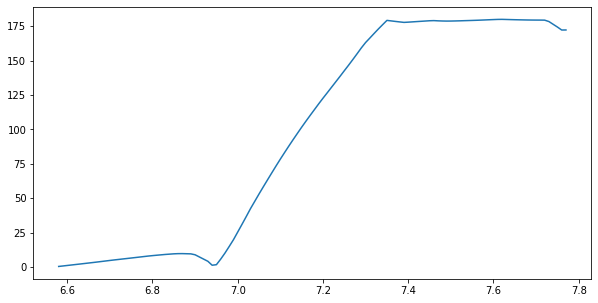

In [5]:

from tools.trick_post_processing import get_azimuth
quaternion=Quaternion()
print(trick.gyroscope[:,100])
g_fixes=[]
q=[]
theta_list=[]
euler_list=[]
for i in range(trick.nb_row):
    quaternion.rotate(trick.gyroscope[:,i]*np.pi/180,trick.Te)
    rot =quaternion.get_rot_mat()
    q.append(rot.T)
    theta = np.arctan2(q[-1][1,0],q[-1][1,1])*180/np.pi

    euler=quaternion.get_euler_angles()
    euler_list.append(euler)
    
    theta_list.append(np.abs(theta))

print(quaternion.q)
print(quaternion.get_rot_mat())

plt.figure(figsize=(10,5))
trick.dispRawData()

# euler_list=np.array(euler_list)
# df.plotVector(trick.time, euler_list, "euler angle",111)



test = get_azimuth(trick)
plt.figure(figsize=(10,5))
plt.plot(trick.time, test)
plt.show()